# ENV

In [9]:
# 가끔 아래의 에러가 발생할 경우 다음 코드를 실행한다.
# 로케일 에러
# NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [10]:
import os
import glob

In [11]:
HOME=os.getcwd()
print(HOME)

/home/jupyter


In [12]:
!pwd

/home/jupyter


In [13]:
!nvidia-smi

Thu Nov 23 11:12:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    33W / 300W |      3MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                    0 |
| N/A   

# ultralytics 다운로드

In [14]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.216 🚀 Python-3.10.13 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (16 CPUs, 58.9 GB RAM, 36.0/98.2 GB disk)


In [15]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# %cd {HOME}
# !git clone https://github.com/ultralytics/ultralytics
# %cd ultralytics

In [ ]:
# !ls -al

# BUCKET

In [16]:
# 내 프로젝트명 확인
!gcloud config list --format 'value(core.project)'

sessac-project-21


In [ ]:
# 환경설정
# !PROJECT_ID='sessac-project-08-403700'
# !BUCKET="gs://highway-bucket"

In [ ]:
# BUCKET 만들기
# !gsutil mb -l us-central1 $BUCKET

In [ ]:
# 나의 BUCKET 리스트 보기
# !gsutil list

In [ ]:
# BUCKET 안에 들어있는 파일 확인
# !gsutil ls -r $BUCKET

In [17]:
# hiway 폴더 만들고 거기로 이동
# !mkdir highway
# !cd highway/

In [ ]:
# BUCKET -> 로컬로 파일 복사(=다운로드)
# !gsutil cp $BUCKET/dataset.zip dataset.zip

### 남의 BUCKET

In [ ]:
# 남의 BUCKET 확인
# !gsutil ls -r gs://highway-data-bucket/

In [ ]:
# 남의 BUCKET -> 로컬로 파일 복사(=다운로드)
# highway 폴더 아래에 복사
# !gsutil -m cp gs://highway-data-bucket/dataset.zip highway/dataset.zip

In [ ]:
# !gsutil -m cp gs://highway-data-bucket/dataset.z01 highway/dataset.z01
# !gsutil -m cp gs://highway-data-bucket/dataset.z02 highway/dataset.z02
# !gsutil -m cp gs://highway-data-bucket/dataset.z03 highway/dataset.z03
# !gsutil -m cp gs://highway-data-bucket/dataset.z04 highway/dataset.z04
# !gsutil -m cp gs://highway-data-bucket/dataset.z05 highway/dataset.z05
# !gsutil -m cp gs://highway-data-bucket/dataset.z06 highway/dataset.z06
# !gsutil -m cp gs://highway-data-bucket/dataset.z07 highway/dataset.z07
# !gsutil -m cp gs://highway-data-bucket/dataset.z08 highway/dataset.z08

In [ ]:
# !sudo apt-get install p7zip-full

In [ ]:
# 시간 오래 걸림 (1시간 30분?)
# method 1. 분할된 zip 파일을 바로 압축풀기

# !7z x /home/jupyter/highway/dataset.zip

In [ ]:
# # 시간 오래 걸림
# # method 1.  zip파일이 multi part로 구성되어있어서 
#              bad zipfile 에러때문에 다시 zip 복사 후 unzip 가능
# %cd {HOME}
# zipPath='/home/jupyter/highway/dataset.zip'

# # method 2.  zip파일이 multi part로 구성되어있음
# # bad zipfile 에러때문에 다시 zip 복사 후 unzip 가능

# !zip -s- {zipPath} -O dataset.zip

In [ ]:
# 용량을 위해 bucket에서 받아온 zip 지우기
# !rm -rf highway

## 제일 빠른 방법: multi로 압축 푼 후, 빠진 파일들 다시 unzip -근데 에러남

In [ ]:
%%time
import zipfile
import concurrent.futures
zf = zipfile.ZipFile('/home/jupyter/dataset.zip')
def unzip(file):
    zf.extract(file)
with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(unzip, zf.infolist())

In [ ]:
!unzip -n dataset.zip

# data structrue

![image](https://github.com/timmyeos/SeSAC/assets/97524127/d63cbad2-c2ce-4027-bcf3-96ba745ce884)

In [18]:
dataPath = '/home/jupyter/highway'

In [21]:
# train 개수 확인
a = glob.glob(dataPath+"/train/images/*")
b = glob.glob(dataPath+"/train/labels/*")
len(a), len(b)

(24101, 24101)

In [22]:
# valid 개수 확인
a = glob.glob(dataPath+"/val/images/*")
b = glob.glob(dataPath+"/val/labels/*")
len(a), len(b)

(3333, 3333)

In [ ]:
# %cd {HOME}
# !unzip dataset.zip

In [ ]:
# %cd {HOME}
# zipPath='/home/jupyter/dataset.zip'
# os.makedirs(HOME+"/highway", exist_ok=True)
# !unzip {zipPath} -d highway

# 레이블 시각화 하기

In [23]:
def glob_files(path, file_type="*"):
    search_string = os.path.join(path, file_type)
    files = glob.glob(search_string)

    # print('searching ', path)
    paths = []
    for f in files:
        if os.path.isdir(f):
            sub_paths = glob_files(f + '/')
            paths += sub_paths
        else:
            paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

In [24]:
import cv2
import numpy as np

IMAGE_SIZE = 600

def load_images(path):
    files = glob_files(path, "*.png")
    
    files.sort() #####
    
    # print(files)
    X_data = []
    for file in files[:10]: ##### 10개만
        image = cv2.imread(file)
        # print(image.shape)
        # x = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

        X_data.append(image)
    return np.array(X_data)

X_test = load_images(dataPath+"/train/images")

In [25]:
WIDTH = 1080
HEIGHT = 1920

def load_labels(path):
    files = glob_files(path, "*.txt")
    
    files.sort() #####

    Y_data = []
    for file in files[:10]: ##### 10개만
        with open(file) as f:
            lines = f.readlines()

            boxes = []
            for line in lines:
                tokens = line.split()

                class_id = int(tokens[0])
                xc = float(tokens[1]) * WIDTH
                yc = float(tokens[2]) * HEIGHT
                width = float(tokens[3]) * WIDTH
                height = float(tokens[4]) * HEIGHT

                boxes.append(np.array([class_id, xc, yc, width, height]))
                # print(class_id, xc, yc, width, height)

            Y_data.append(np.array(boxes))
        # print(lines)
    return np.array(Y_data, dtype="object")

Y_test = load_labels(dataPath+"/train/labels")

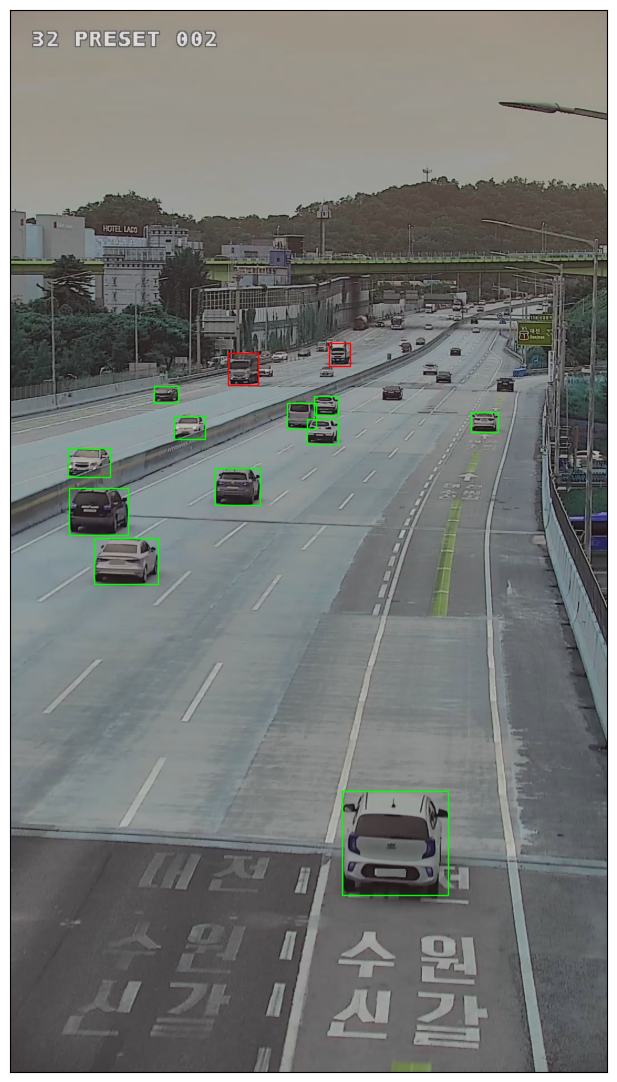

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_patch_rectangle(y, color):
  # # in yolov5
  width = int(y[2])
  height = int(y[3])
  return patches.Rectangle((int(y[0] - width/2), int(y[1] - height/2)),
                           width, height,
                           edgecolor=color, fill=False)

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def plot_image(image, boxes, axis):
  # # print(boxes.shape)
  for box in boxes:
    # print(box)
    class_id = int(box[0])
    # print(type(class_id), class_id)
    rect = create_patch_rectangle(box[1:], COLORS[class_id])
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images(X, Y, limit=10):
  fig = plt.figure(figsize=(100, 80))

  last_id = min(limit, X.shape[0])
  for id in range(last_id):
    axis = fig.add_subplot(5, 3, id + 1)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], Y[id], axis)

plot_images(np.array([X_test[-1]]), np.array([Y_test[-1]]))

# 데이터셋 경로 설정하기

In [27]:
dataPath

'/home/jupyter/highway'

In [28]:
import os
from glob import glob

trainPath = os.path.join(dataPath,'train')
validPath = os.path.join(dataPath,'val')
#testPath  = os.path.join(dataPath,'test')

trainImagesPath = os.path.join(trainPath, 'images')
validImagesPath = os.path.join(validPath, 'images')
#testImagesPath  = os.path.join(testPath,  'images')

trainLabelsPath = os.path.join(trainPath, 'labels')
validLabelsPath = os.path.join(validPath, 'labels')
#testLabelsPath  = os.path.join(testPath,  'labels')

In [15]:
# # train/images
# os.makedirs(trainImagesPath, exist_ok=True)
# os.makedirs(validImagesPath, exist_ok=True)
# os.makedirs(testImagesPath, exist_ok=True)

# os.makedirs(trainLabelsPath, exist_ok=True)
# os.makedirs(validLabelsPath, exist_ok=True)
# os.makedirs(testLabelsPath, exist_ok=True)

In [29]:
trainImagesPath, trainLabelsPath

('/home/jupyter/highway/train/images', '/home/jupyter/highway/train/labels')

In [56]:
# for filename in glob(os.path.join(trainPath,'*.png')):
#     basename = os.path.basename(filename)
#     os.rename(filename, os.path.join(trainImagesPath,basename))

# for filename in glob(os.path.join(validPath,'*.png')):
#     basename = os.path.basename(filename)
#     os.rename(filename, os.path.join(validImagesPath,basename))

# for filename in glob(os.path.join(testPath,'*.png')):
#     basename = os.path.basename(filename)
#     os.rename(filename, os.path.join(testImagesPath,basename))


# for filename in glob(os.path.join(trainPath,'*.txt')):
#     basename = os.path.basename(filename)
#     os.rename(filename, os.path.join(trainLabelsPath,basename))

# for filename in glob(os.path.join(validPath,'*.txt')):
#     basename = os.path.basename(filename)
#     os.rename(filename, os.path.join(validLabelsPath,basename))

# for filename in glob(os.path.join(testPath,'*.txt')):
#     basename = os.path.basename(filename)
#     os.rename(filename, os.path.join(testLabelsPath,basename))

In [30]:
import torch

In [31]:
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} \
    ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0+cu118     (Tesla V100-SXM2-16GB)


In [19]:
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [22]:
# device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

In [32]:
# GPU 이름 체크(cuda:0에 연결된 그래픽 카드 기준)
print(torch.cuda.get_device_name()) # 'NVIDIA TITAN X (Pascal)'

Tesla V100-SXM2-16GB


In [33]:
!nvidia-smi

Thu Nov 23 12:02:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    33W / 300W |      3MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                    0 |
| N/A   

# Write data.yaml

In [34]:
!pwd

/home/jupyter


In [ ]:
# %cd ultralytics

In [ ]:
# !ls -al

In [35]:
from IPython.core.magic import register_line_cell_magic

# yaml에 직접 쓰기를 실행하는 함수
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [36]:
dataPath

'/home/jupyter/highway'

In [37]:
dataYaml = os.path.join(dataPath,'data.yaml')
dataYaml

'/home/jupyter/highway/data.yaml'

In [39]:
print(trainImagesPath)
print(validImagesPath)
# print(testImagesPath)

/home/jupyter/highway/train/images
/home/jupyter/highway/val/images


In [40]:
%%writetemplate {dataYaml}
train: {trainImagesPath}
val: {validImagesPath}

nc: 3
names: ['car', 'bus', 'truck']

## nano model test

In [41]:
!pwd

/home/jupyter


In [42]:
# AttributeError: 'FreeTypeFont' object has no attribute 'getsize'
!pip install Pillow==9.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 28.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 10.0.1
    Uninstalling Pillow-10.0.1:
      Successfully uninstalled Pillow-10.0.1


In [43]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 19372, done.
remote: Counting objects: 100% (556/556), done.
remote: Compressing objects: 100% (343/343), done.
remote: Total 19372 (delta 269), reused 424 (delta 212), pack-reused 18816
Receiving objects: 100% (19372/19372), 10.84 MiB | 8.05 MiB/s, done.
Resolving deltas: 100% (13454/13454), done.


In [55]:
%cd /home/jupyter/ultralytics

/home/jupyter/ultralytics


In [ ]:
%%time
# !yolo task=detect mode=train model=yolov8n.pt data={dataYaml} epochs=75 imgsz=640 plots=True batch=16 device=0,1 cache=True 
!yolo task=detect mode=train model=yolov8n.pt data={dataYaml} epochs=150 imgsz=640 plots=True batch=16 device=0,1 cache=True

Ultralytics YOLOv8.0.216 🚀 Python-3.10.13 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
                                                             CUDA:1 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jupyter/highway/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=(0, 1), workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

In [46]:
HOME

'/home/jupyter'

In [59]:
import shutil

shutil.make_archive('/home/jupyter/ultralytics/runs/detect', 'zip', '/home/jupyter/ultralytics/runs/detect')

'/home/jupyter/ultralytics/runs/detect.zip'

In [48]:
!ls {HOME}/ultralytics/runs/detect/train/

F1_curve.png			 labels_correlogram.jpg  train_batch97957.jpg
PR_curve.png			 results.csv		 val_batch0_labels.jpg
P_curve.png			 results.png		 val_batch0_pred.jpg
R_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch97955.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch97956.jpg	 weights


/home/jupyter


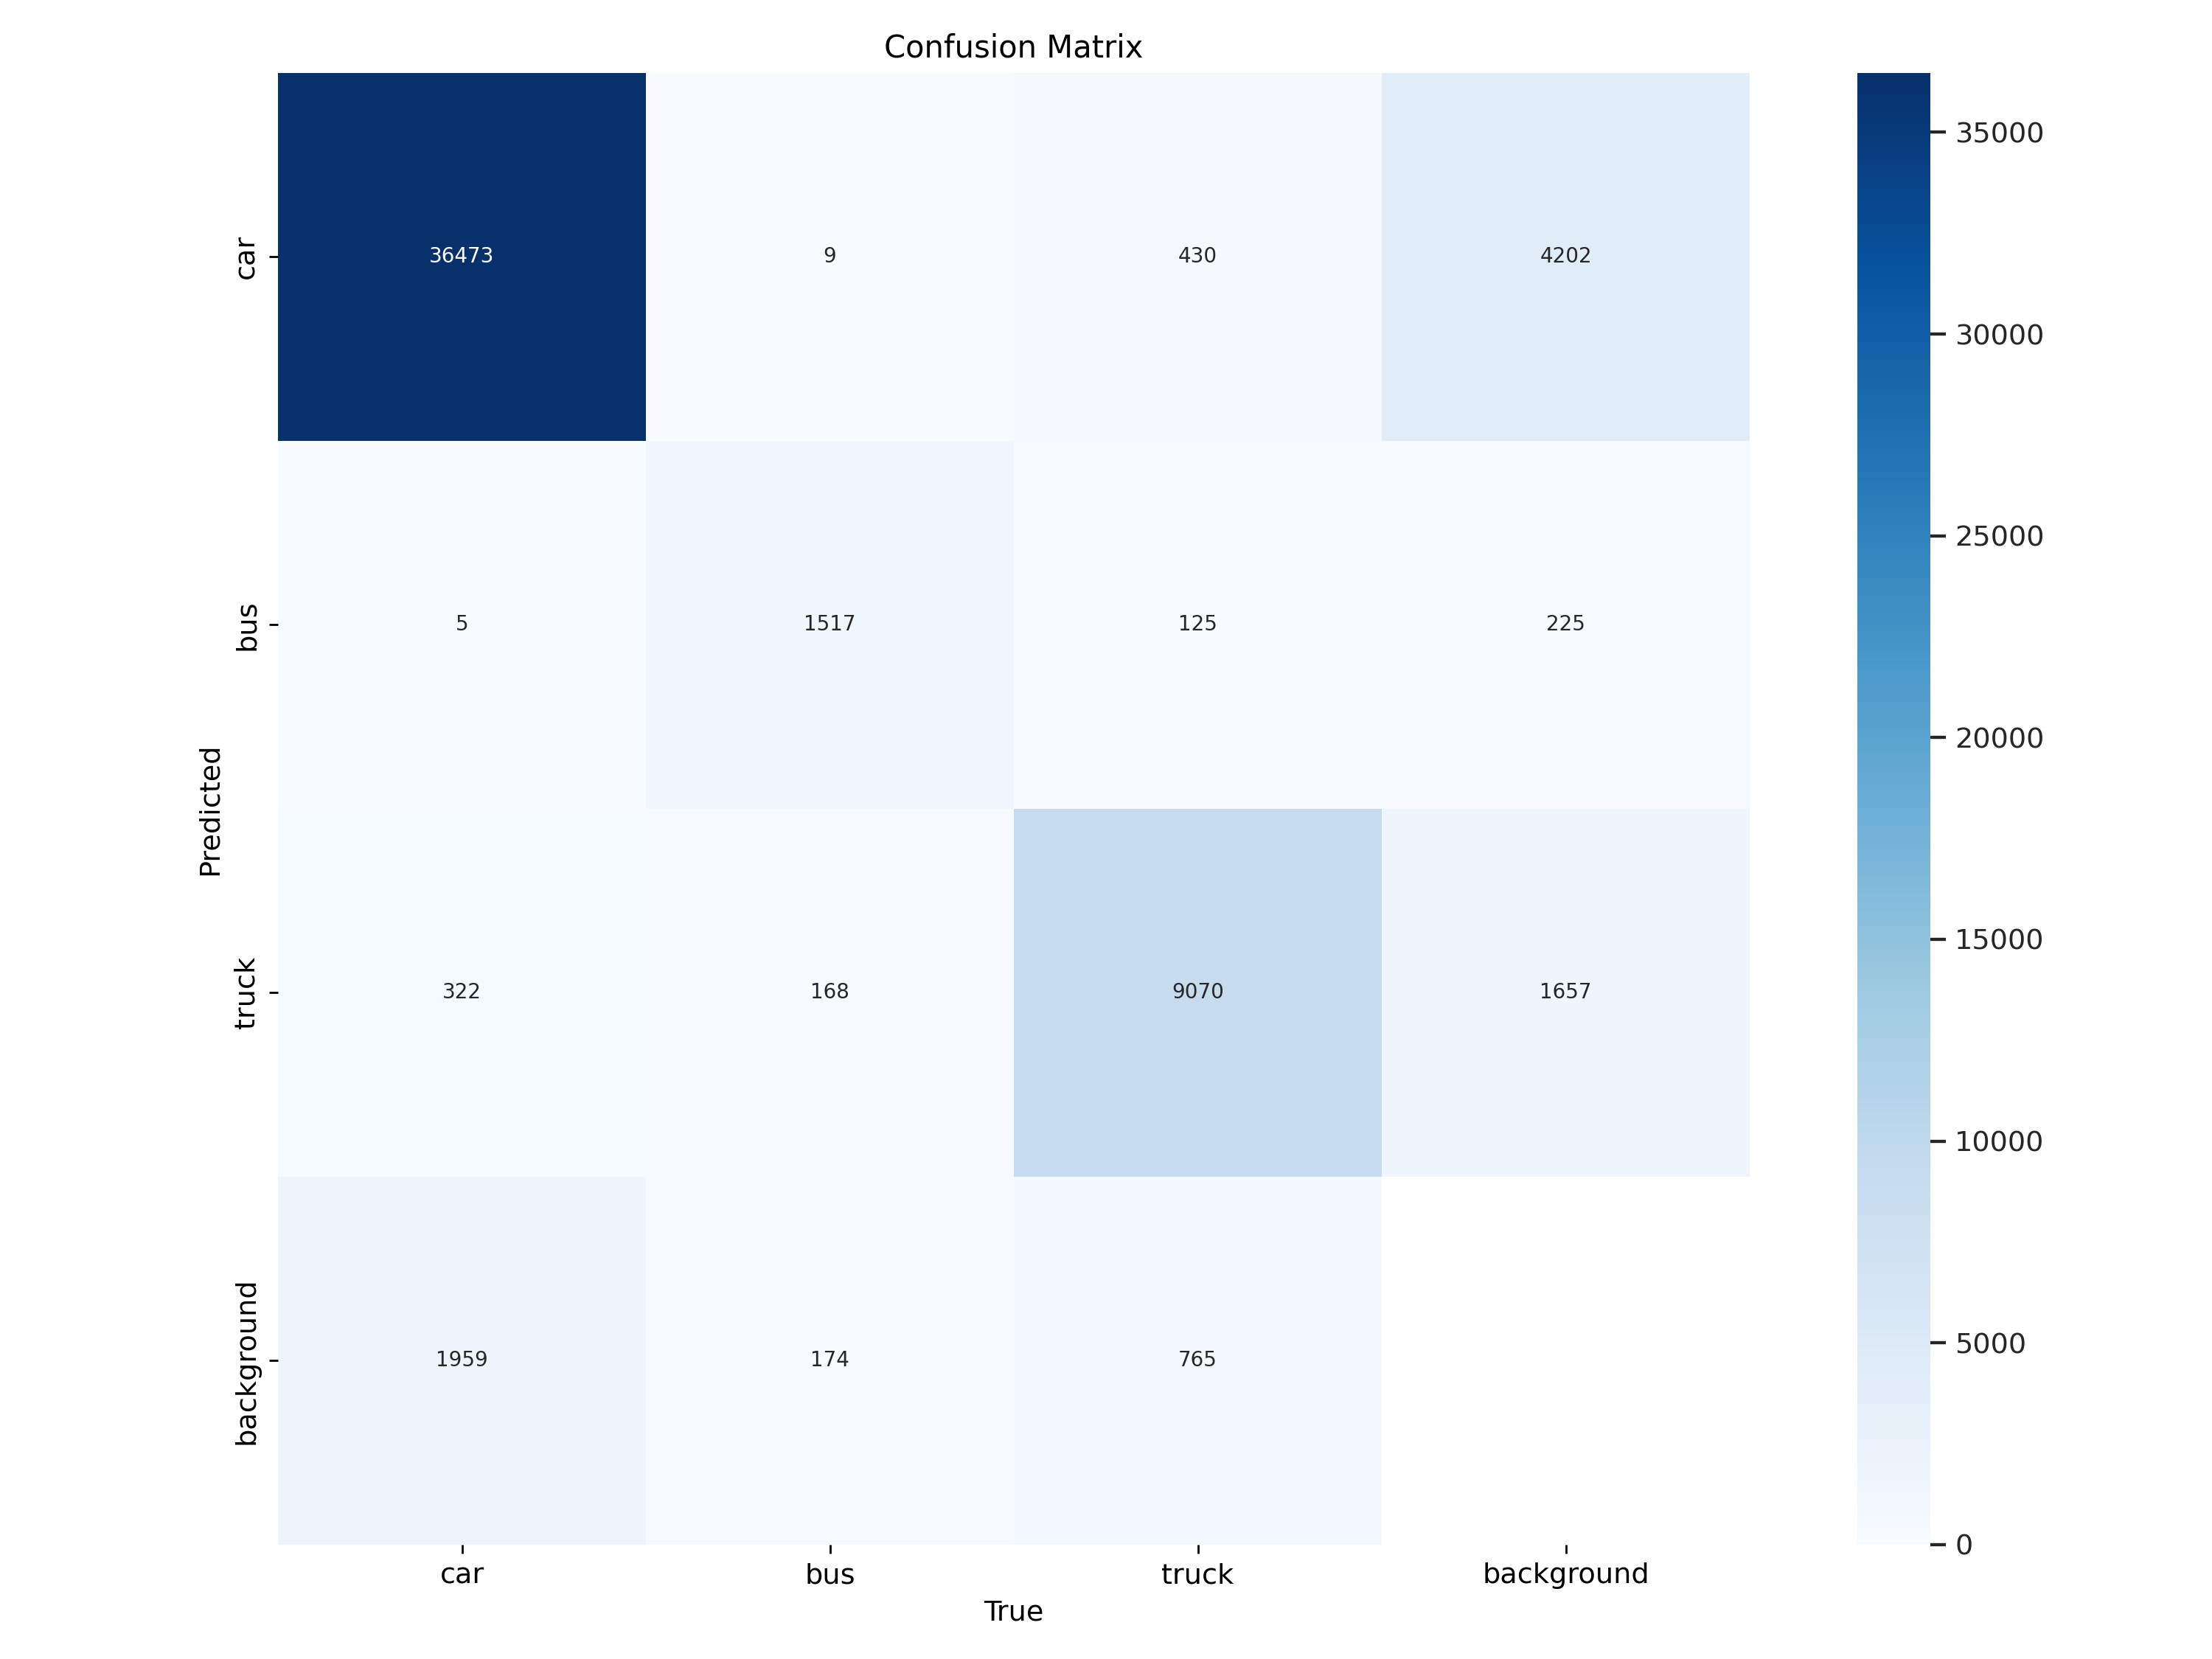

In [57]:
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/confusion_matrix.png', width=600)

/home/jupyter


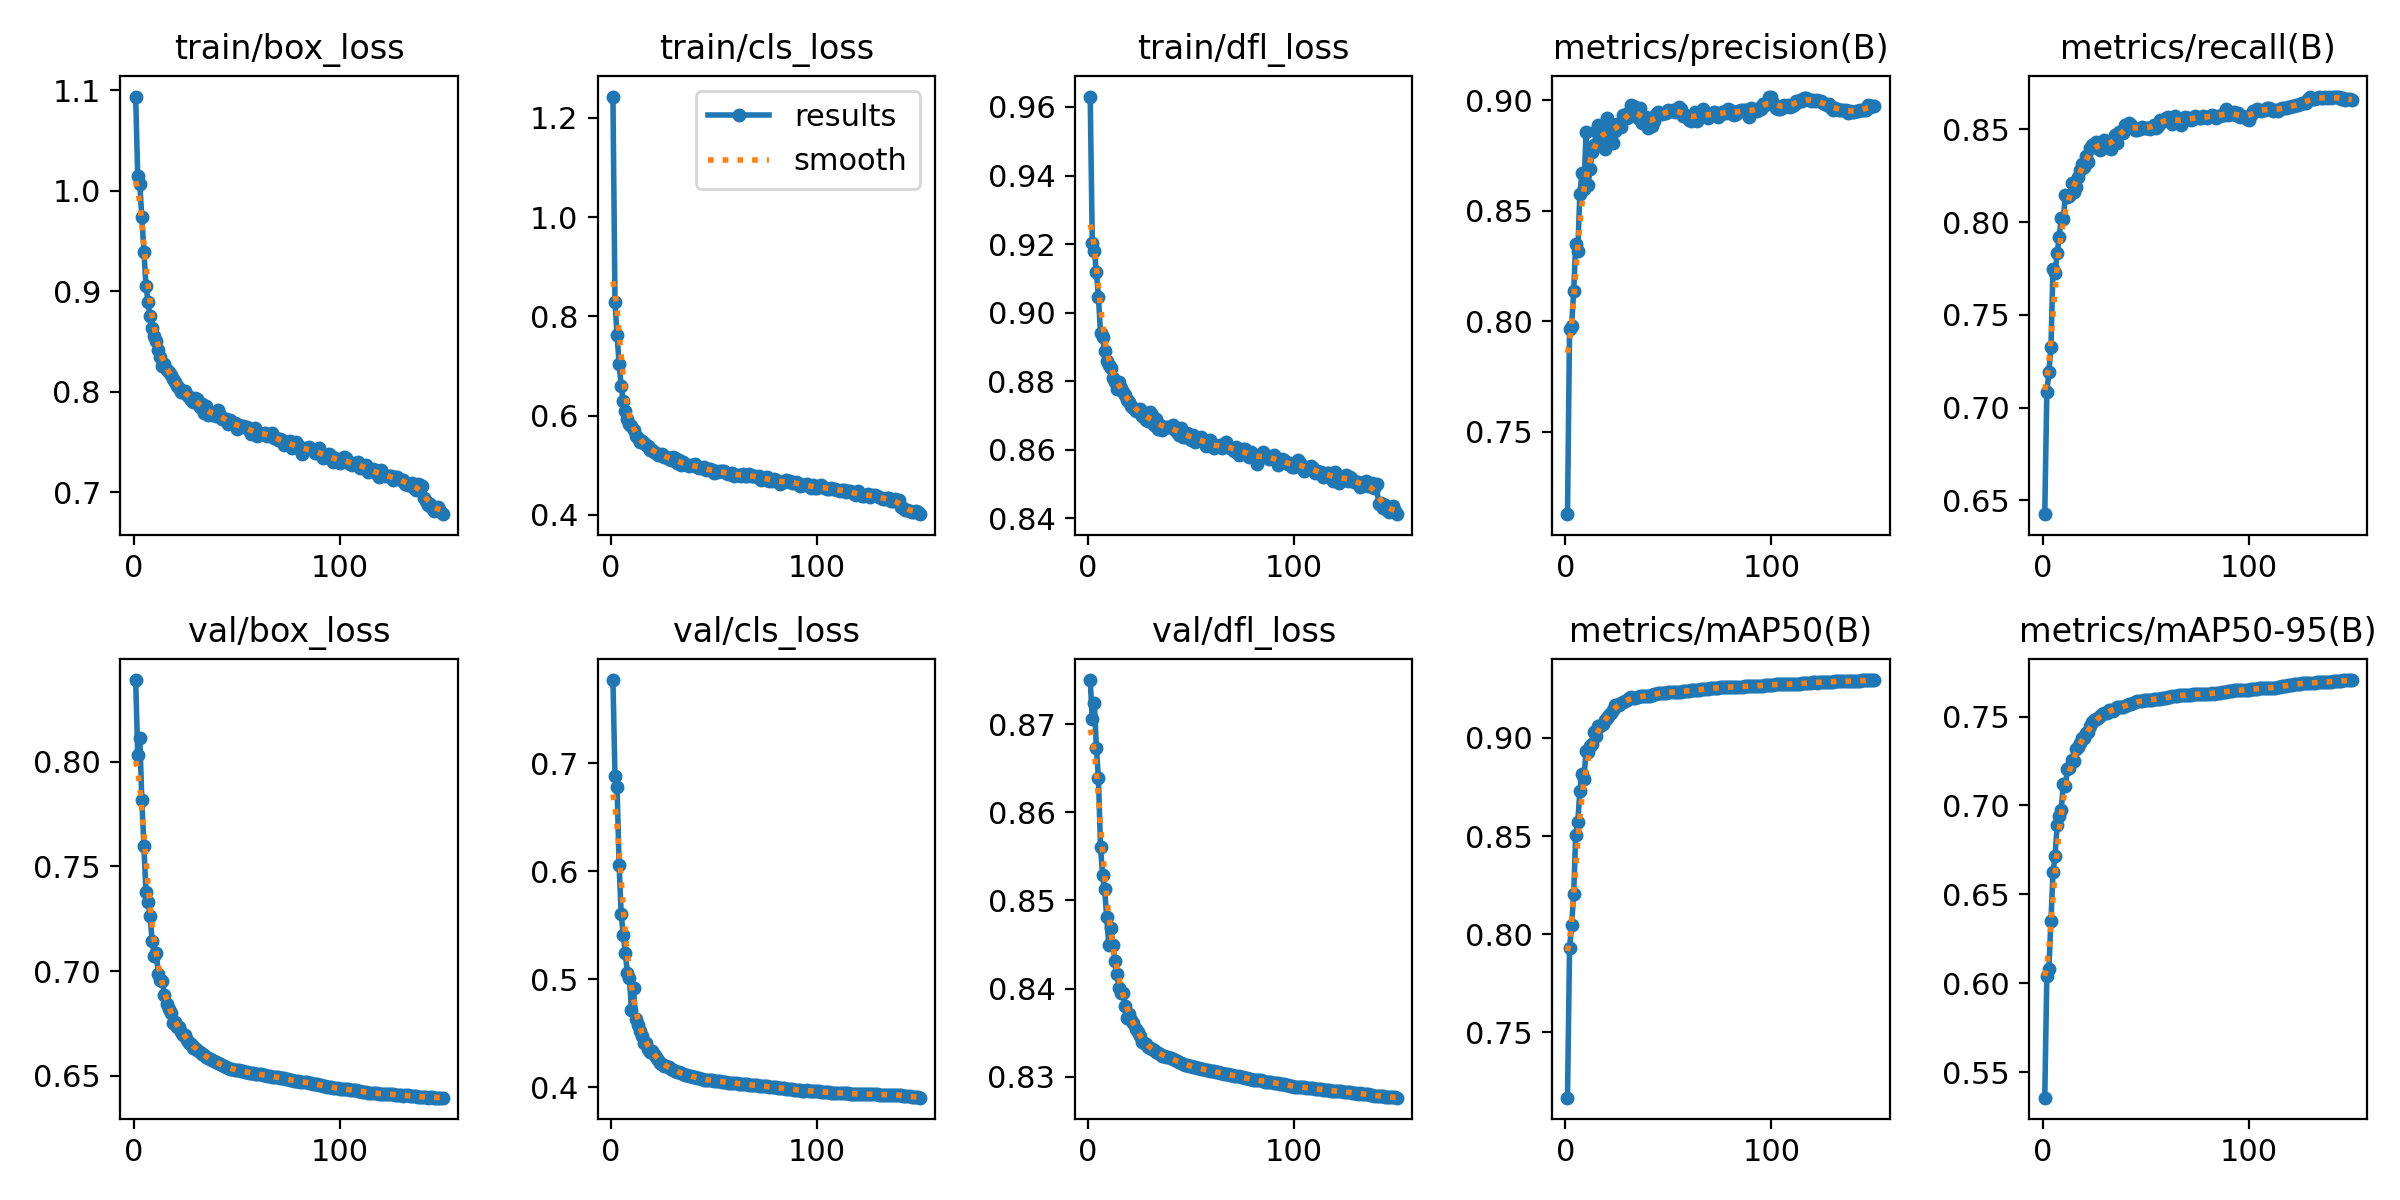

In [58]:
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train2/results.png', width=600)

/home/jupyter


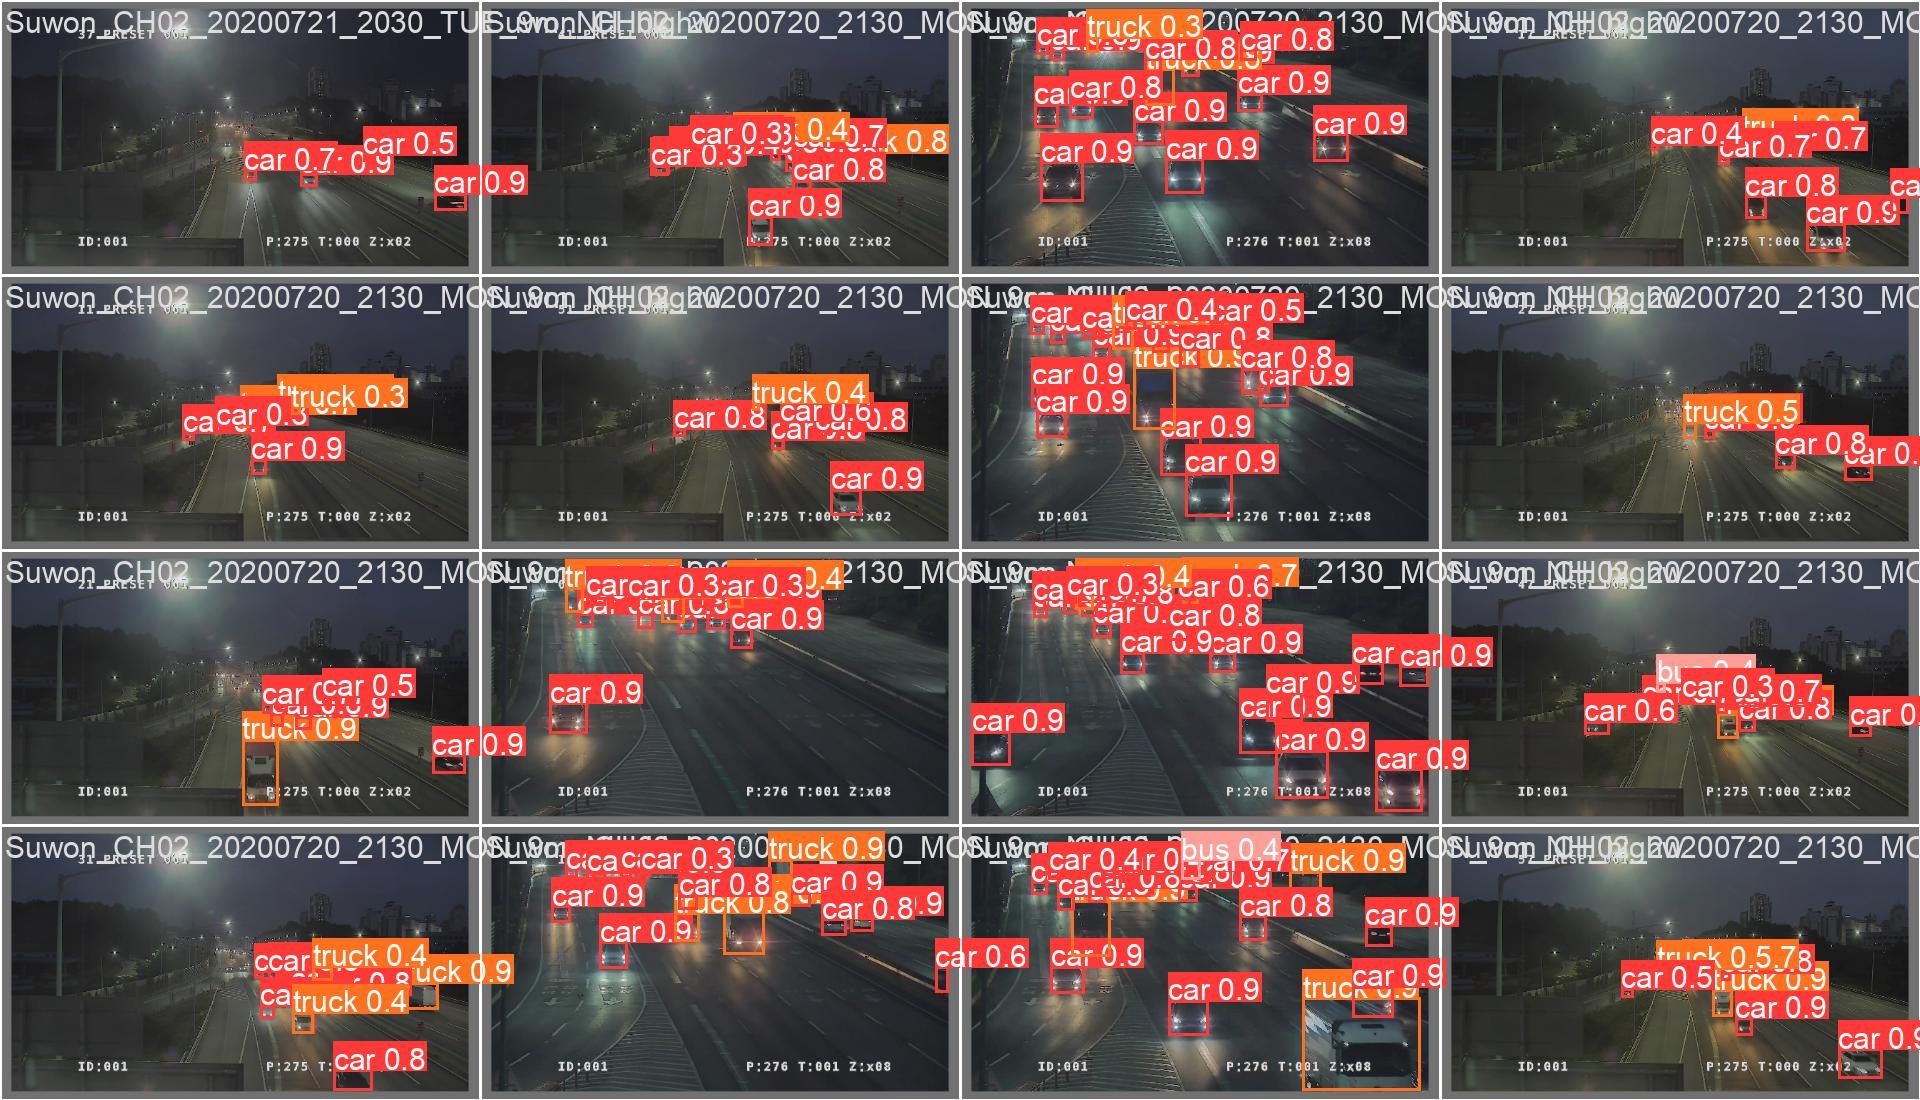

In [51]:
%cd {HOME}
Image(filename=f'{HOME}/ultralytics/runs/detect/train/val_batch0_pred.jpg', width=600)

## small model

In [52]:
torch.cuda.empty_cache()

In [53]:
torch.cuda.is_available()

True

In [64]:
import os

os.environ["OMP_NUM_THREADS"] = '8' # 사용할 thread 만큼 부여

In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8s.yaml')  # build a new model from YAML
# model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8s.yaml').load('yolov8s.pt')  # build from YAML and transfer weights
model = YOLO(f'{HOME}/yolov8s.pt')

# Train the model
results = model.train(data=dataYaml, epochs=400, imgsz=640, batch=32, patience=20, workers=15)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/home/jupyter/dataset/data.yaml, epochs=400, patience=20, batch=32, imgsz=640, save=True, cache=False, device=, workers=15, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

In [ ]:
import os
os.getcwd()

In [ ]:
testImages = HOME+'/highway/dataset/valid/images'
from glob import glob

testList =[]
for filename in glob(os.path.join(testImages, '*.png')):
    testList.append(filename)

In [ ]:
testList

In [ ]:
from ultralytics import YOLO

resultList =[]

# Load a pretrained YOLOv8n model
model = YOLO('/content/ultralytics/ultralytics/runs/detect/train2/weights/best.pt')

# Run inference on images
results = model(testList)

# View results
for result in results:
    resultList.append(result.cpu().numpy().boxes.cls)  # print the Boxes object containing the detection bounding boxes

In [ ]:
import pandas as pd
sum = [0, 0, 0]

for result in resultList:
    for i in range(len(sum)):
        sum[i] += result.tolist().count(i)
print(sum)

print("전체 {}장의 이미지에서 승용차 {}대, 버스 {}대, 트럭 {}대를 발견하였습니다.".format(len(resultList), sum[0], sum[1], sum[2]))

## 추가 함수들

In [ ]:
%cd /content/highway/bbox_highway/
!mkdir temp

In [ ]:
def write_yolov5_txt(folder, annotation):
  out_filename = folder + annotation[0][:-3] + 'txt'
  f = open(out_filename,"w+")
  for box in annotation[3]:
    f.write("{} {} {} {} {}\n".format(box[0], box[1], box[2], box[3], box[4]))

for ann in anns:
  write_yolov5_txt(DATA_ROOT + 'train/', ann)